# Exploring Table Data
#### Jake Rowlnad and Paul Herz

## 1. Purpose
Paul and I decied to use the IMDb dataset. This dataset contains around 5000 movies from the Internatonal Movie Database. Movie tastes and rating vary widely from person to person and I can be very hard to recommend a movie to an individual. 

The IMDb dataset contians 28 different columns describing individual movies. These range from the Movie Title to the Aspect Ratio, even have the Number of faces that appear on the title poster, and Facebook statistics!

Our purpose is to visualize and draw conclusions from the many variables this dataset provides. Narrow down the important features and ensure that the data is both valid and meaningful.

-------------------------------------------------------------------

Dataset @ https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

Primary Question: What key features result in a well ranked movie?

## 2. Understanding the Data

### 2.1 Data Understanding

In [1]:
import pandas as pd

m = pd.read_csv('movie_metadata.csv')

# Reorder the DataFrame to a more intelligent fashion
m = m[[
    'movie_title','title_year',
    
    'genres', 'plot_keywords', 'duration',
    
    'budget', 'gross',
    
    'language', 'country', 'content_rating',
    
    'color', 'aspect_ratio',
    
    'facenumber_in_poster',
    
    'director_name',
    
    'actor_1_name', 'actor_2_name', 'actor_3_name',
    
    'movie_facebook_likes', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
    'actor_3_facebook_likes', 'cast_total_facebook_likes',
    
    'movie_imdb_link', 'num_user_for_reviews', 'num_critic_for_reviews', 'num_voted_users',
    'imdb_score',
]]

# Reduce the number of float64 data types for columns that do not need a float64 data type
for col in ['title_year','facenumber_in_poster','movie_facebook_likes',
'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
'cast_total_facebook_likes','num_user_for_reviews','num_critic_for_reviews',
'num_voted_users']:
    m[col] = pd.to_numeric(m[col],downcast='integer')
   
# Convet categorical values to category type
for col in ['language','country','content_rating','color','aspect_ratio']:
    m[col] = m[col].astype('category')

# Create a copy to perserve the original DataFrame
m_original=m.copy()
m.head()

,movie_title,title_year,genres,plot_keywords,duration,budget,gross,language,country,content_rating,...,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_imdb_link,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,178.0,237000000.0,760505847.0,English,USA,PG-13,...,0.0,1000.0,936.0,855.0,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,723.0,886204,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,169.0,300000000.0,309404152.0,English,USA,PG-13,...,563.0,40000.0,5000.0,1000.0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,302.0,471220,7.1
2,Spectre,2015.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,148.0,245000000.0,200074175.0,English,UK,PG-13,...,0.0,11000.0,393.0,161.0,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,602.0,275868,6.8
3,The Dark Knight Rises,2012.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,164.0,250000000.0,448130642.0,English,USA,PG-13,...,22000.0,27000.0,23000.0,23000.0,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,813.0,1144337,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.0,131.0,12.0,NaN,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,8,7.1


In [2]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
genres                       5043 non-null object
plot_keywords                4890 non-null object
duration                     5028 non-null float64
budget                       4551 non-null float64
gross                        4159 non-null float64
language                     5031 non-null category
country                      5038 non-null category
content_rating               4740 non-null category
color                        5024 non-null category
aspect_ratio                 4714 non-null category
facenumber_in_poster         5030 non-null float64
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
movie_facebook_likes        

In [3]:
print("Maximum category with missing values has {0:.2f}% missing values before any inference or removals"
      .format((1 - m.count().min()/ len(m)) * 100))

Maximum category with missing values has 17.53% missing values before any inference or removals


----------------------------------------

On initial inspections, many fields have missing values, with gross missing the most at 17.53%. We wanted to modify our dataset in an attempt to have the most coverage of columns as we could. To begin with, we removed any forgien films. We noticed that both gross and budget were never standarized and gross was only reported as USA gross. A prime example is the film Princess Mononoke that had a budget of 2.4 billion Yen. Along with forgien films, we also removed the Movie Title, Actor 1's name, Actor 2's name, Actor 3's name, Plot Keywords and the IMDb Link. None of these features would be relevant in our analazis.

In [4]:
# Remove forgien films to solve the normalization problem
m = m[m['country'] == 'USA']

In [5]:
# Remove names except for the Director. 
#m.drop('movie_title', axis=1, inplace=True)
m.drop('plot_keywords', axis=1, inplace=True)
m.drop('actor_1_name', axis=1, inplace=True)
m.drop('actor_2_name', axis=1, inplace=True)
m.drop('actor_3_name', axis=1, inplace=True)
m.drop('movie_imdb_link', axis=1, inplace=True)

In [6]:
# [CITE] https://codedump.io/share/w8TDdH1LYgGt/1/format-certain-floating-dataframe-columns-into-percentage-in-pandas
nullPercents = m.isnull().sum()/m.count()
nullPercents.sort_values(inplace=True,ascending=False)
nullPercents = pd.Series([str(round(val*100, 2))+"%" for val in nullPercents], index = nullPercents.index)
nullPercents

gross                        17.68%
budget                        8.49%
aspect_ratio                  6.19%
content_rating                4.33%
director_facebook_likes       1.98%
title_year                    1.98%
director_name                 1.98%
num_critic_for_reviews        1.04%
color                         0.37%
num_user_for_reviews          0.34%
actor_3_facebook_likes        0.34%
facenumber_in_poster          0.32%
language                      0.26%
actor_2_facebook_likes        0.18%
duration                      0.16%
actor_1_facebook_likes        0.11%
genres                         0.0%
imdb_score                     0.0%
country                        0.0%
num_voted_users                0.0%
movie_facebook_likes           0.0%
cast_total_facebook_likes      0.0%
movie_title                    0.0%
dtype: object

Above is the per-column percentage of missing values. We decided to remove instead of impute most of these values because, as you will see later, there is not much intra group similarity for these missing values unfortunately.

### 2.2 Data Modification

To begin with title year, language, country, content rating, aspect ratio, duration, color, gross, and budget, are highly variable data points for each movie and are not imputable. Pual and I decied to remove any row that had NaN values for these columns

In [7]:
for col in ['title_year', 'language','country','content_rating','aspect_ratio','duration', 'color','gross','budget']:
    m = m[pd.notnull(m[col])]

Social media presence was a major value we wanted to look at as well. Social trends however can be very hard to prodict so we decied to remove any row that did not have and facebook like data.

In [8]:
for col in ['movie_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
'actor_3_facebook_likes','cast_total_facebook_likes']:
    m = m[pd.notnull(m[col])]

Finally, the last major column that was missing a portion of its data was IMDb's own review numbers, and the number of faces present in the poster. Because this is an IMDb dataset, we believed that if no value was present for the number of users and critics that wrote reviews, then zero(0) users or critics reviewed that movie. For the number of faces present in the poster we took the average, rounded to the nearest whole number, as our interpreted value.

After removing these columns and rows, we wanted to bin the continuous IMDb score to be more meaningful. Our approch involed converting the score to a poor, average, or good ranking based on ranges in the IMDb score column. 

In [9]:
for col in ['num_user_for_reviews','num_critic_for_reviews']:
    m[col].fillna(value=0,inplace=True)

avgFace = round(m['facenumber_in_poster'].mean())
m['facenumber_in_poster'].fillna(value=avgFace, inplace=True)

# [0%-49%] is Poor, [50%-89%] is Average, [90%-100%] is Good.
poor_avg = m['imdb_score'].quantile(.5)
avg_good = m['imdb_score'].quantile(.9)
m['rating_category'] = pd.cut(m.imdb_score,[0,poor_avg,avg_good,10],labels=['poor','average','good'])

# Seprately Groupby rating category
poor = m[m['rating_category'] == 'poor']
average =m[m['rating_category'] == 'average']
good = m[m['rating_category'] == 'good']

After removing rows with values that could not interpreted, and filling in those that could, we have a complete data set of 22 columns with zero missing elemenets. While we unfortunately lost some of our original data, we now have a completely populated dataset with no missing values ready for visualization.

## 3. Data Visualization

In [10]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'figure.figsize': (10, 6)})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({'font.family': 'Helvetica, Arial, sans-serif'})

%config InlineBackend.figure_format = 'retina'

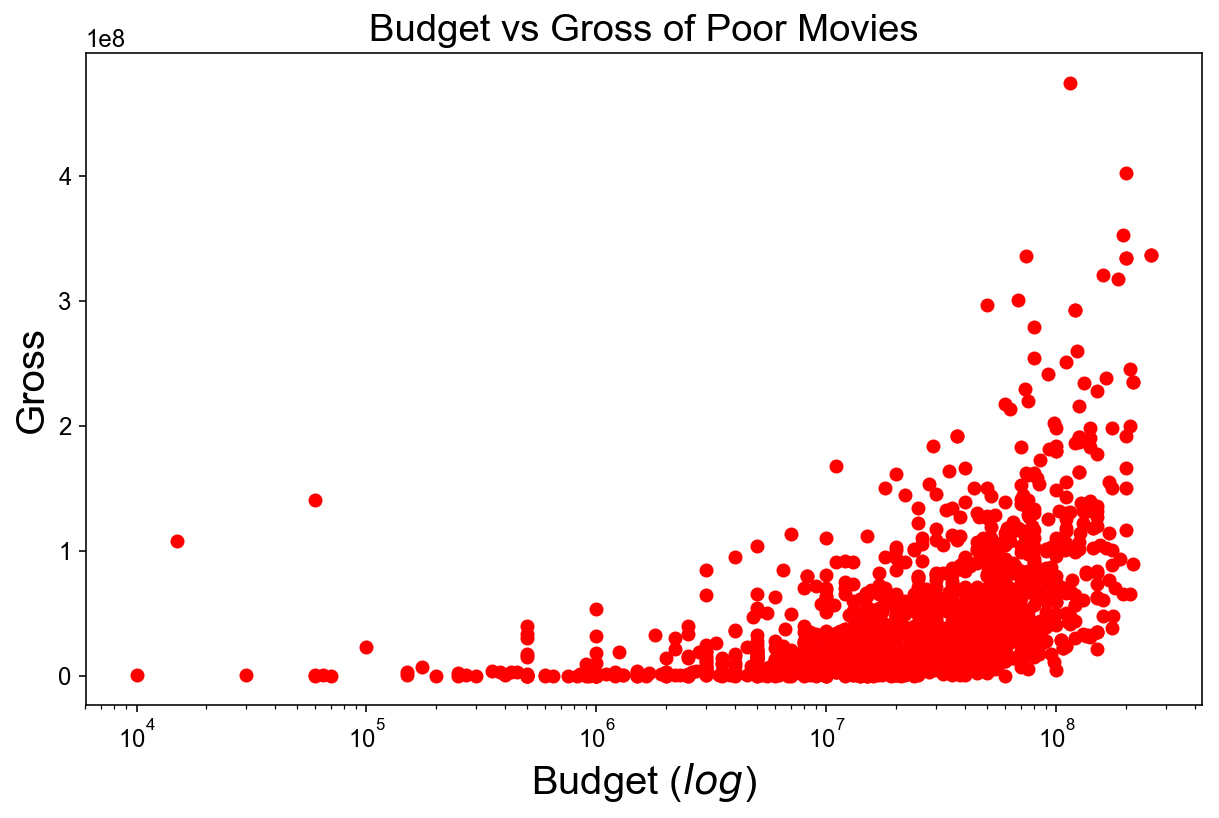

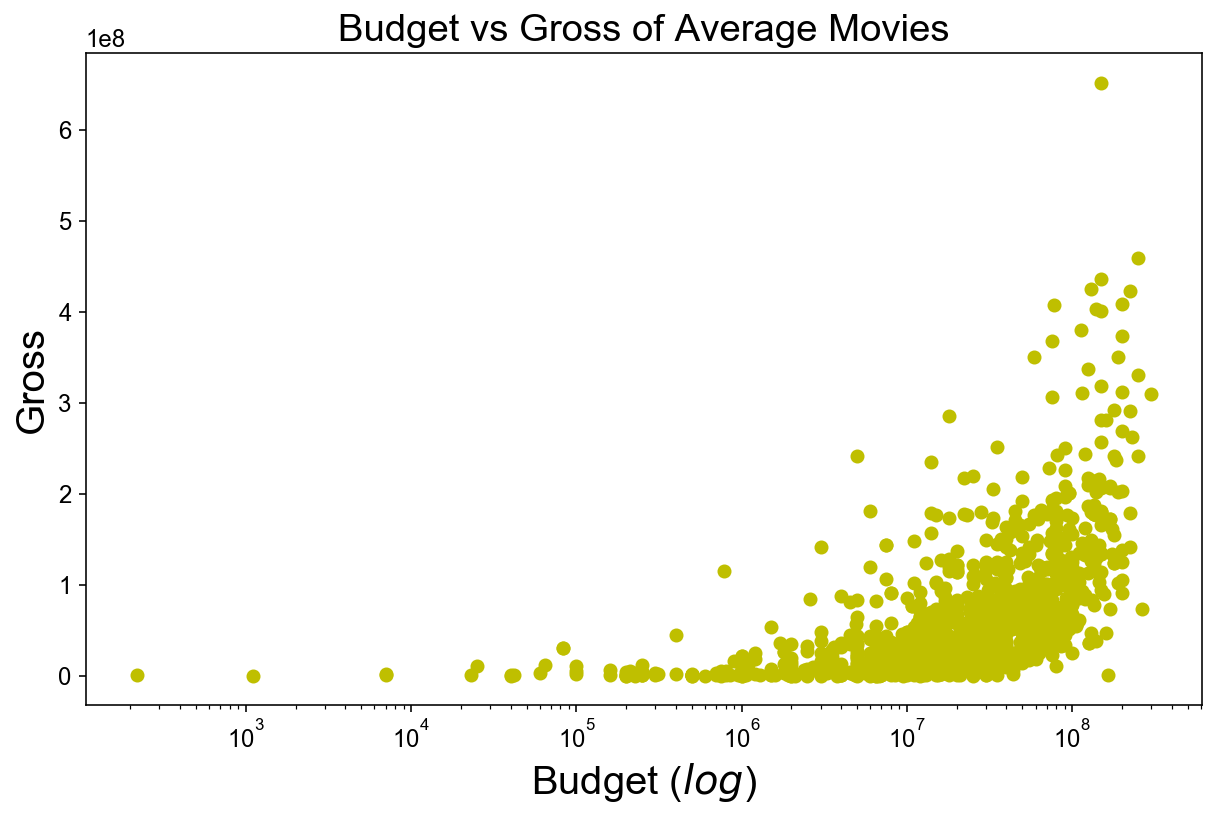

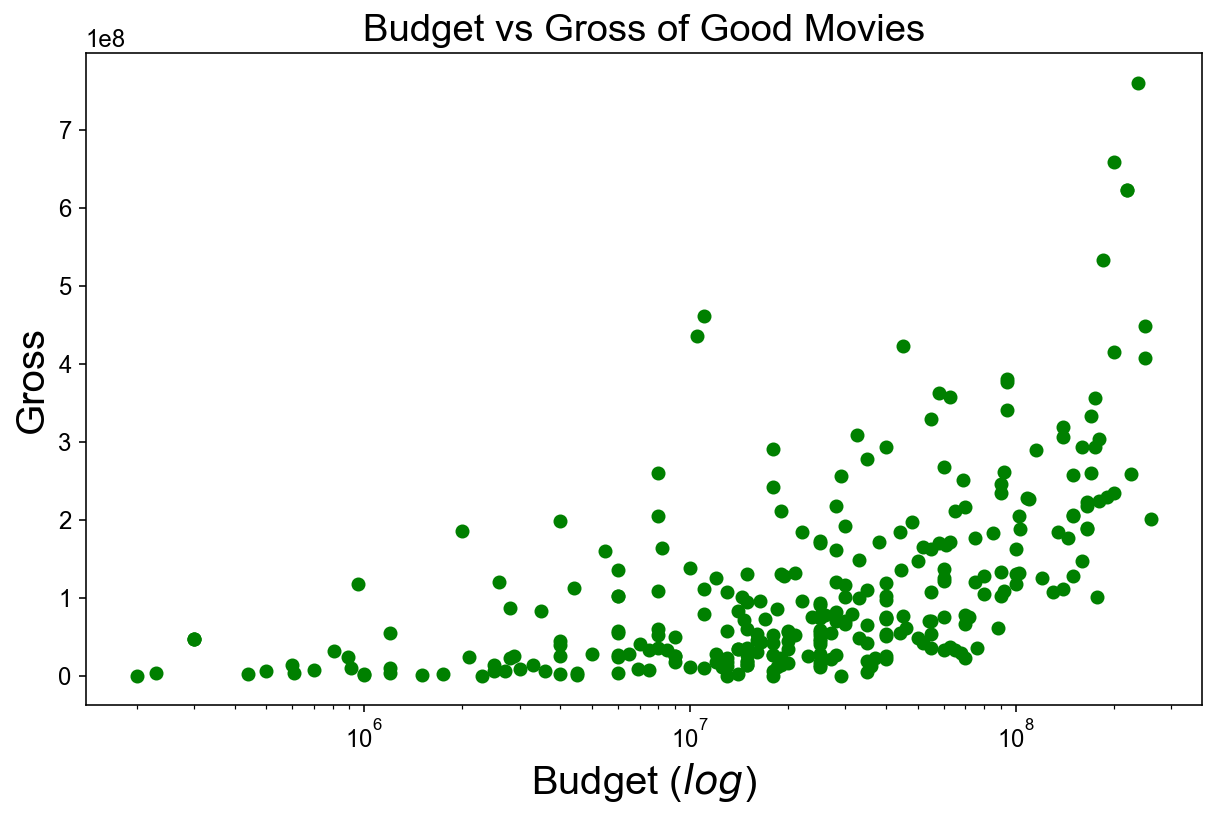

In [11]:
plt.scatter(poor['budget'], poor['gross'], color='r')
plt.title('Budget vs Gross of Poor Movies')
plt.xlabel('Budget ($log$)')
plt.ylabel('Gross')
plt.xscale('log')
plt.show()

plt.scatter(average['budget'], average['gross'], color='y')
plt.title('Budget vs Gross of Average Movies')
plt.xlabel('Budget ($log$)')
plt.ylabel('Gross')
plt.xscale('log')
plt.show()

plt.scatter(good['budget'], good['gross'], color='g')
plt.title('Budget vs Gross of Good Movies')
plt.xlabel('Budget ($log$)')
plt.ylabel('Gross')
plt.xscale('log')
plt.show()

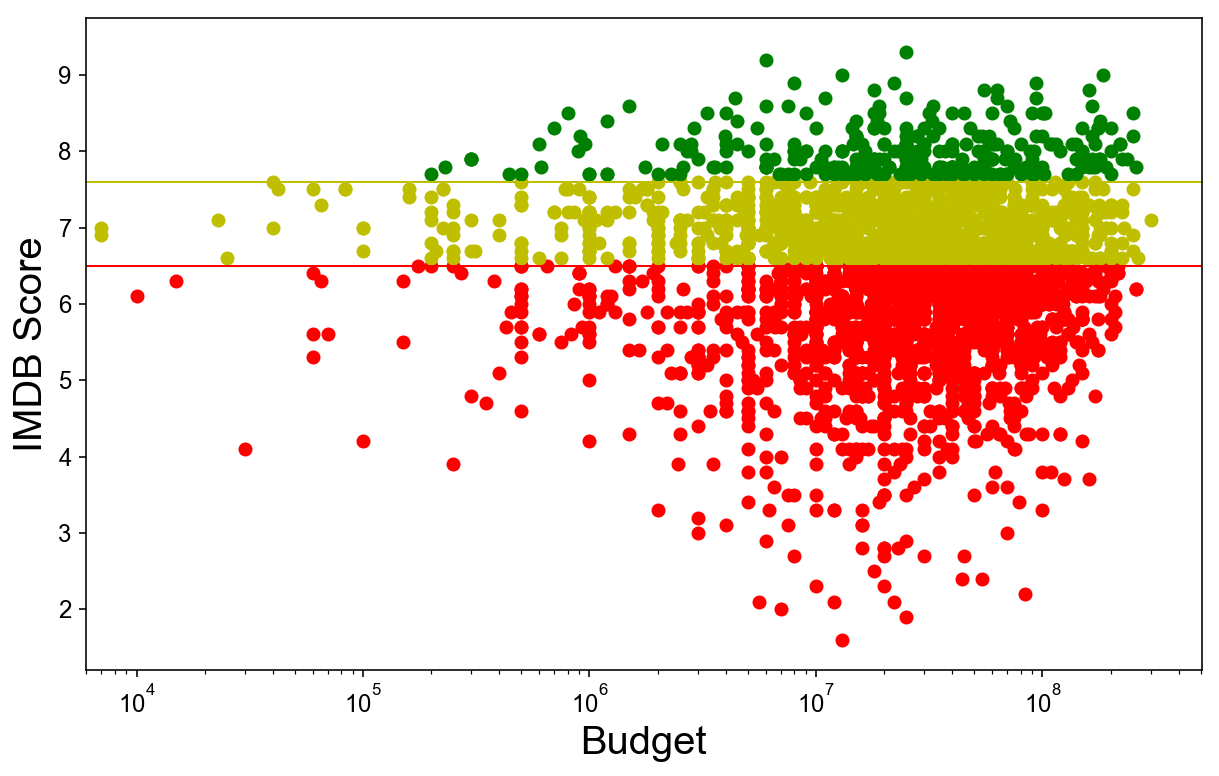

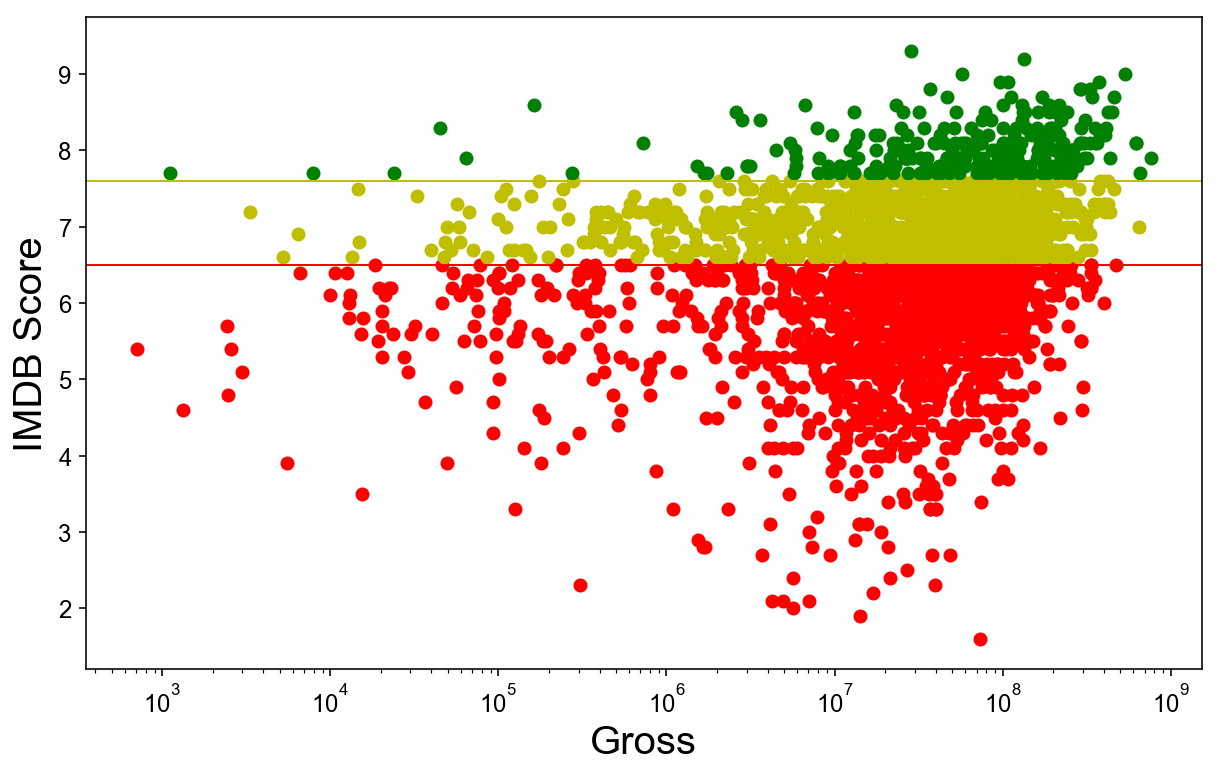

In [12]:
plt.scatter(poor['budget'], poor['imdb_score'], color='r', label="Poor Movies")
plt.scatter(average['budget'], average['imdb_score'], color='y', label="Average Movies")
plt.scatter(good['budget'], good['imdb_score'], color='g', label="Good Movies")
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.show()

plt.scatter(poor['gross'], poor['imdb_score'], color='r', label="Poor Movies")
plt.scatter(average['gross'], average['imdb_score'], color='y', label="Average Movies")
plt.scatter(good['gross'], good['imdb_score'], color='g', label="Good Movies")
plt.xlabel('Gross')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")

plt.show()

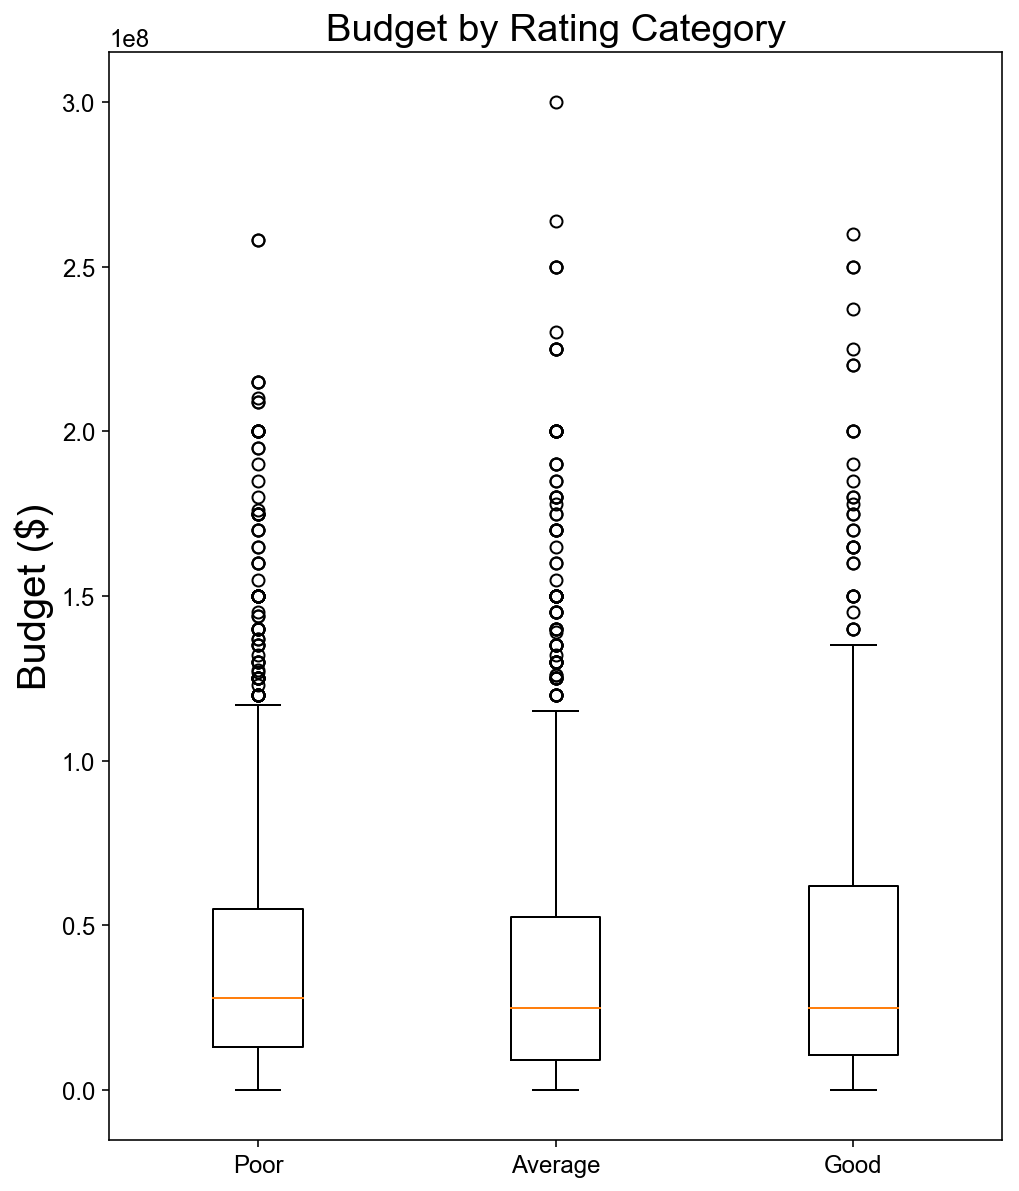

In [13]:
dataset = [poor['budget'],average['budget'],good['budget']]

plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Budget by Rating Category')
plt.ylabel('Budget ($)')
plt.show()

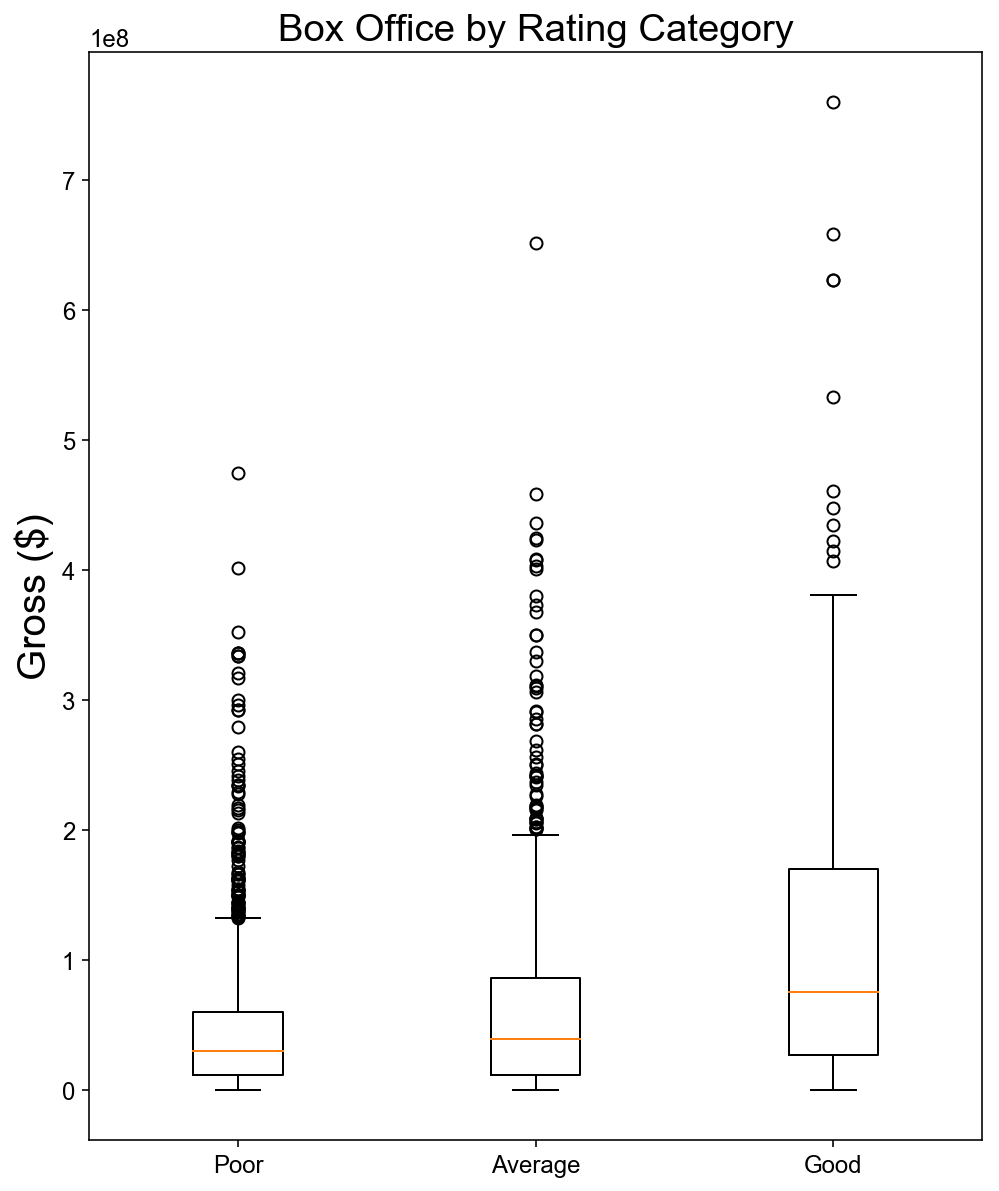

In [14]:
dataset = [poor['gross'],average['gross'],good['gross']]

plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Box Office by Rating Category')
plt.ylabel('Gross ($)')
plt.show()

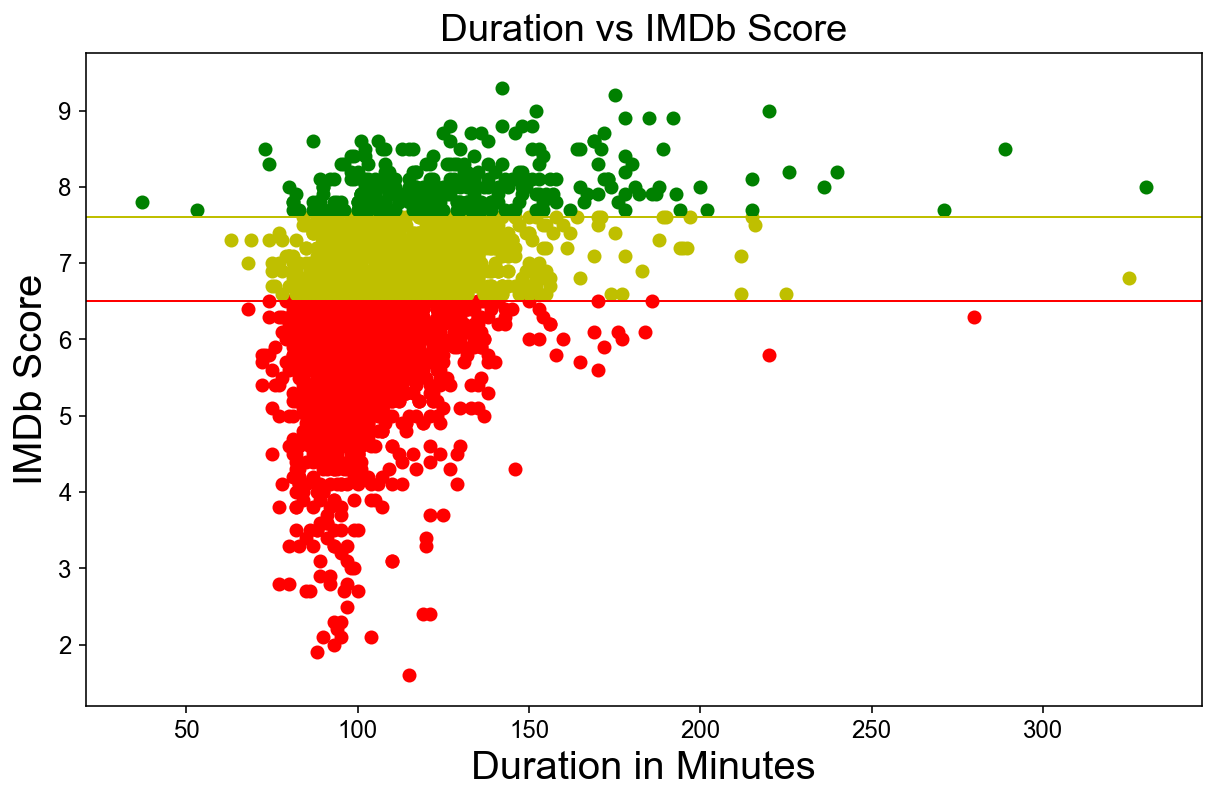

In [15]:
plt.scatter(poor['duration'],poor['imdb_score'], color='r')
plt.scatter(average['duration'],average['imdb_score'], color='y')
plt.scatter(good['duration'],good['imdb_score'], color='g')
plt.title("Duration vs IMDb Score")
plt.xlabel("Duration in Minutes")
plt.ylabel("IMDb Score")
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.show()

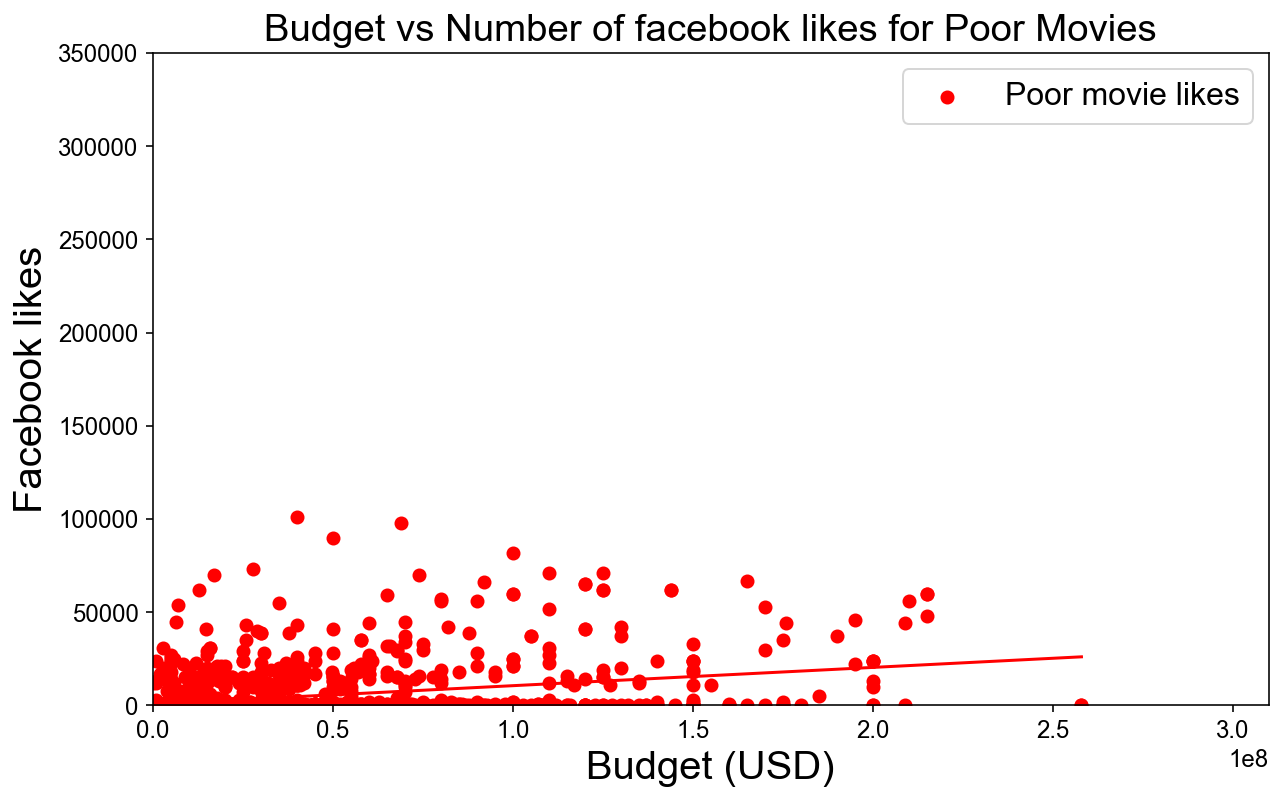

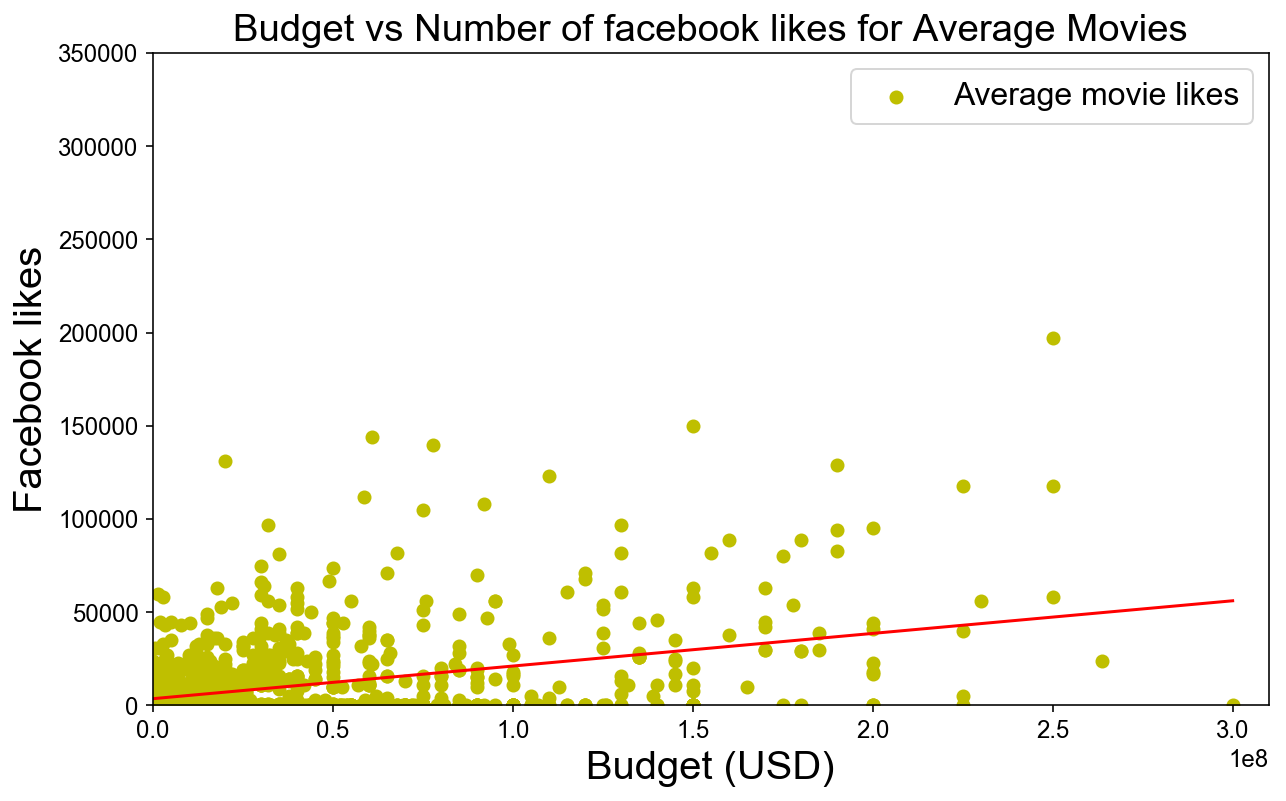

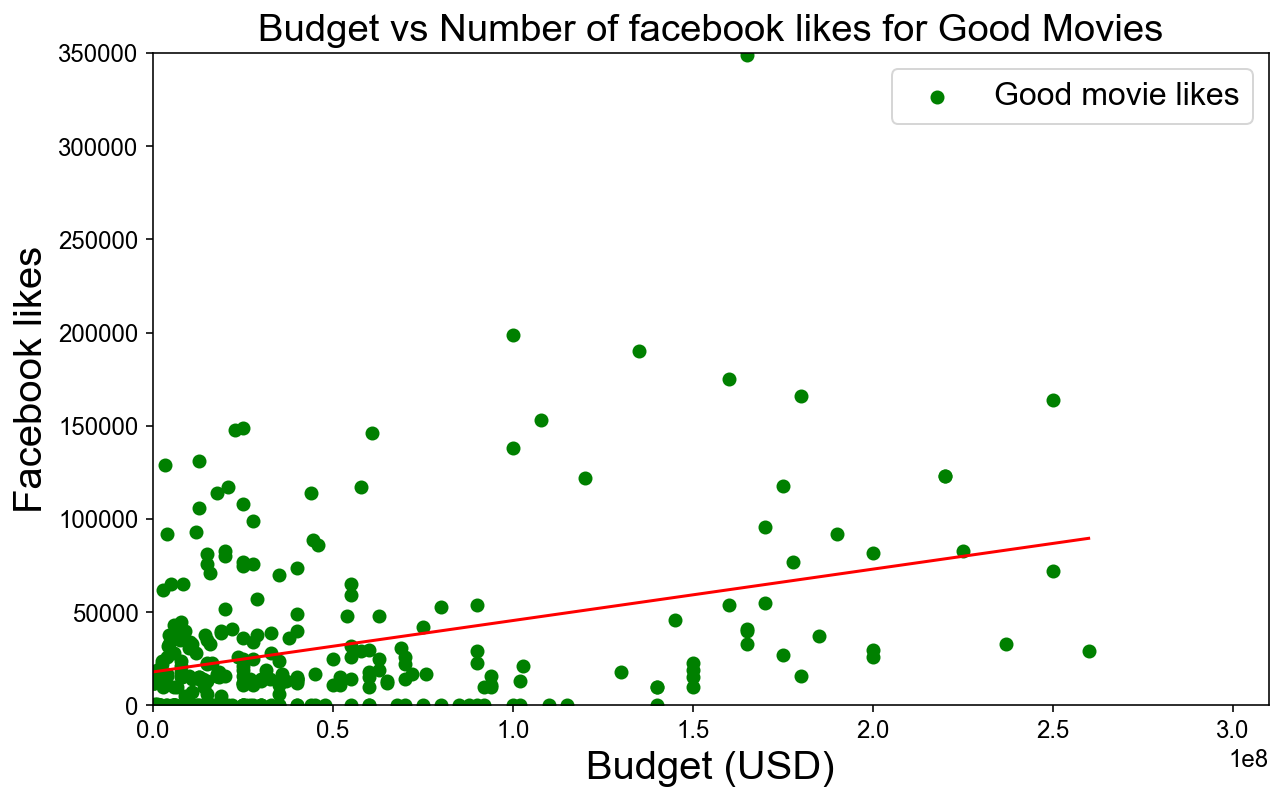

In [16]:
import numpy as np

plt.scatter(poor['budget'],poor['movie_facebook_likes'], color='r', label="Poor movie likes")
plt.title("Budget vs Number of facebook likes for Poor Movies")
plt.xlabel("Budget (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(poor['budget']), np.poly1d(np.polyfit(poor['budget'], poor['movie_facebook_likes'], 1))
        (np.unique(poor['budget'])), color='r')
plt.legend()
plt.show()

plt.scatter(average['budget'],average['movie_facebook_likes'], color='y', label="Average movie likes")
plt.title("Budget vs Number of facebook likes for Average Movies")
plt.xlabel("Budget (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(average['budget']), np.poly1d(np.polyfit(average['budget'], average['movie_facebook_likes'], 1))
        (np.unique(average['budget'])), color='r')
plt.legend()
plt.show()

plt.scatter(good['budget'],good['movie_facebook_likes'], color='g', label="Good movie likes")
plt.title("Budget vs Number of facebook likes for Good Movies")
plt.xlabel("Budget (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(good['budget']), np.poly1d(np.polyfit(good['budget'], good['movie_facebook_likes'], 1))
        (np.unique(good['budget'])), color='r')
plt.legend()
plt.show()

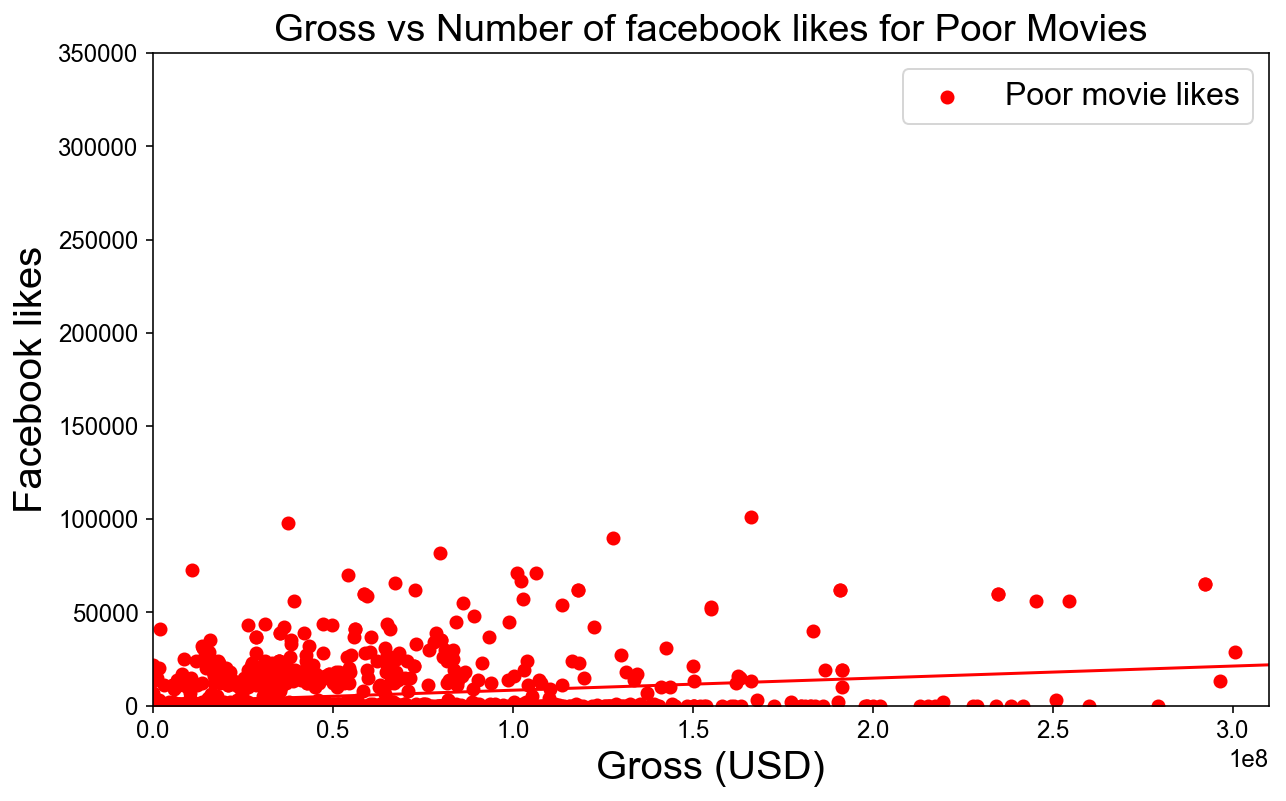

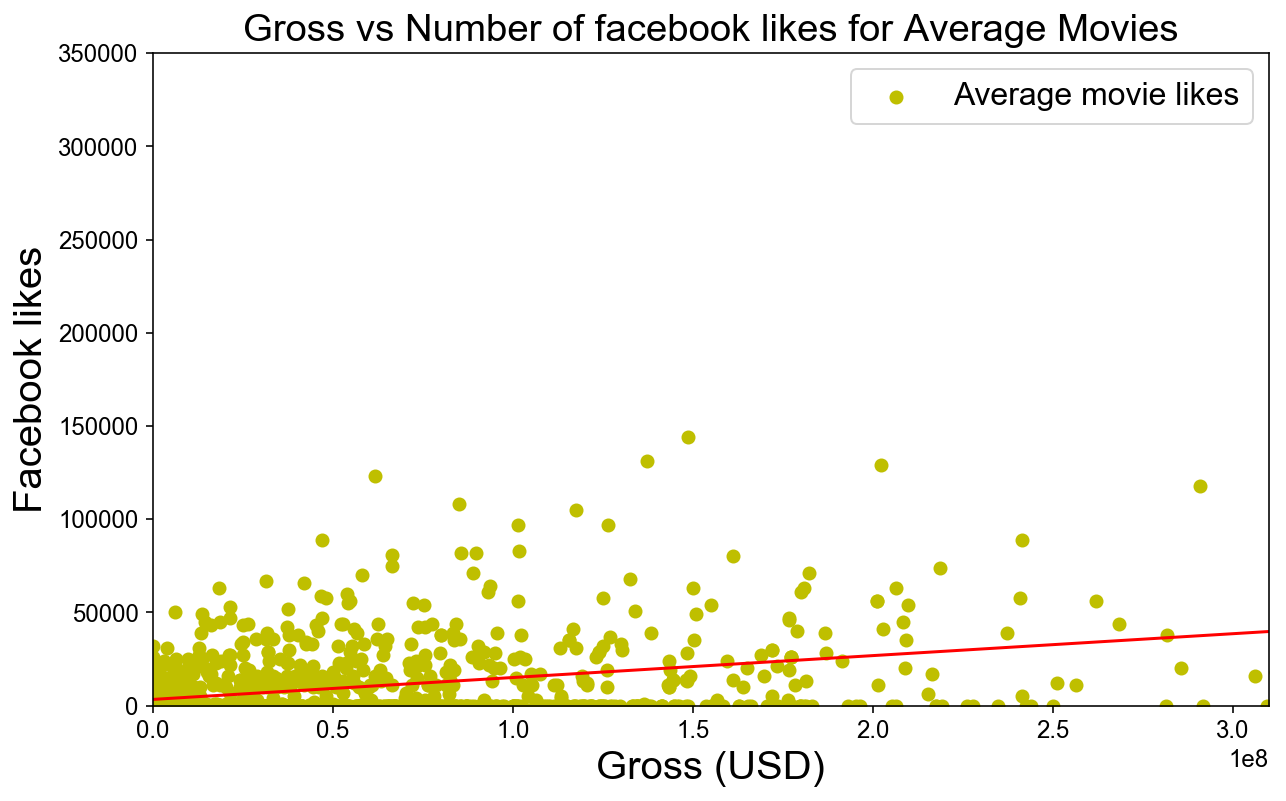

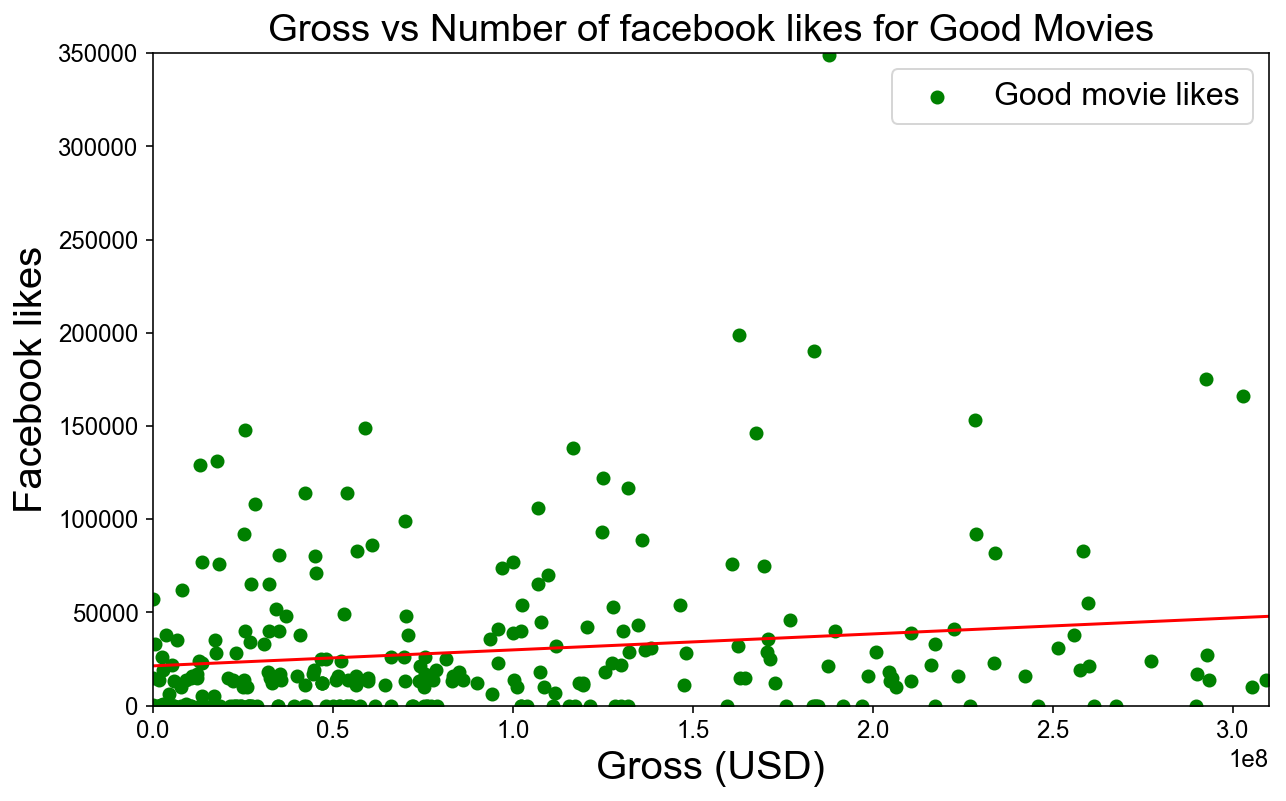

In [17]:
plt.scatter(poor['gross'],poor['movie_facebook_likes'], color='r', label="Poor movie likes")
plt.title("Gross vs Number of facebook likes for Poor Movies")
plt.xlabel("Gross (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(poor['gross']), np.poly1d(np.polyfit(poor['gross'], poor['movie_facebook_likes'], 1))
        (np.unique(poor['gross'])), color='r')
plt.legend()
plt.show()

plt.scatter(average['gross'],average['movie_facebook_likes'], color='y', label="Average movie likes")
plt.title("Gross vs Number of facebook likes for Average Movies")
plt.xlabel("Gross (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(average['gross']), np.poly1d(np.polyfit(average['gross'], average['movie_facebook_likes'], 1))
        (np.unique(average['gross'])), color='r')
plt.legend()
plt.show()

plt.scatter(good['gross'],good['movie_facebook_likes'], color='g', label="Good movie likes")
plt.title("Gross vs Number of facebook likes for Good Movies")
plt.xlabel("Gross (USD)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(good['gross']), np.poly1d(np.polyfit(good['gross'], good['movie_facebook_likes'], 1))
        (np.unique(good['gross'])), color='r')
plt.legend()
plt.show()

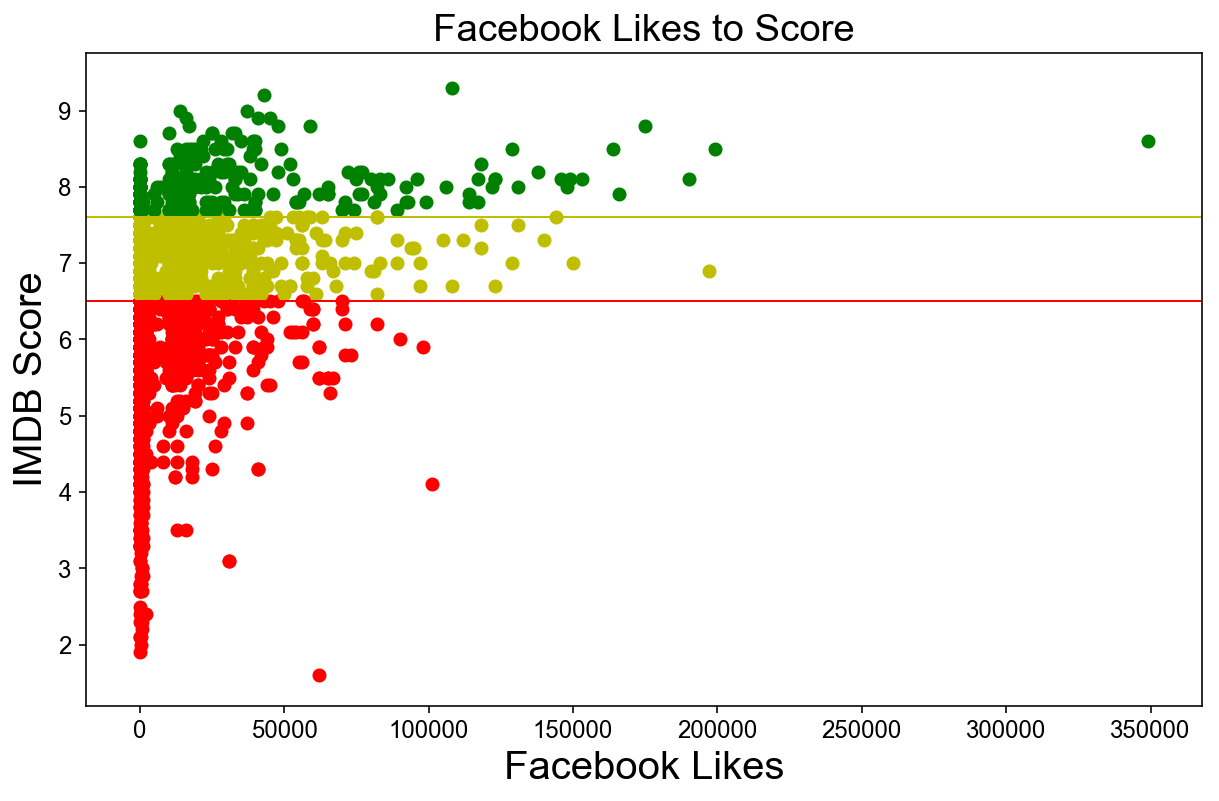

In [18]:
plt.scatter(poor['movie_facebook_likes'], poor['imdb_score'], color='r' , label='Poor')
plt.scatter(average['movie_facebook_likes'], average['imdb_score'], color='y' , label='Average')
plt.scatter(good['movie_facebook_likes'], good['imdb_score'], color='g', label='Good')
plt.title('Facebook Likes to Score')
plt.xlabel('Facebook Likes')
plt.ylabel('IMDB Score')
plt.axhline(y=poor_avg, linewidth=1, color = 'r')
plt.axhline(y=avg_good, linewidth=1, color = 'y')
plt.show()

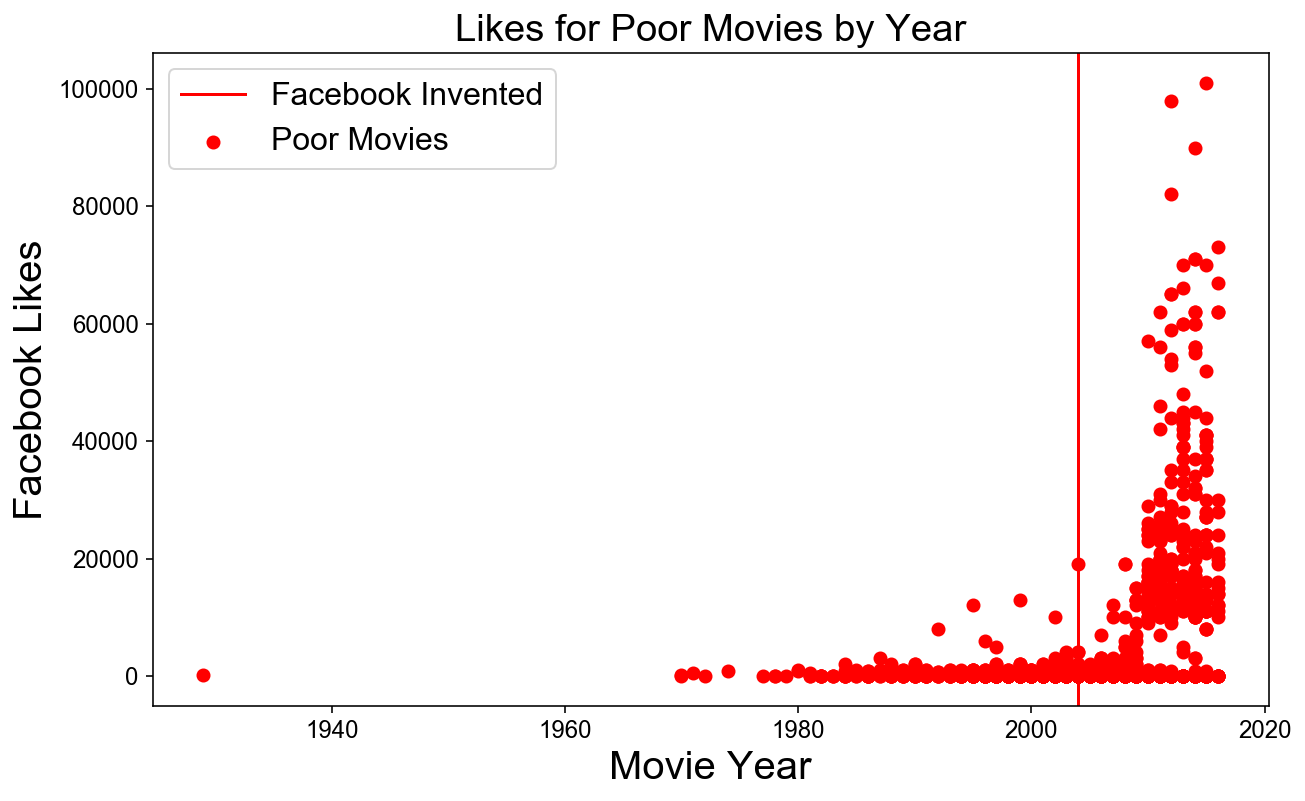

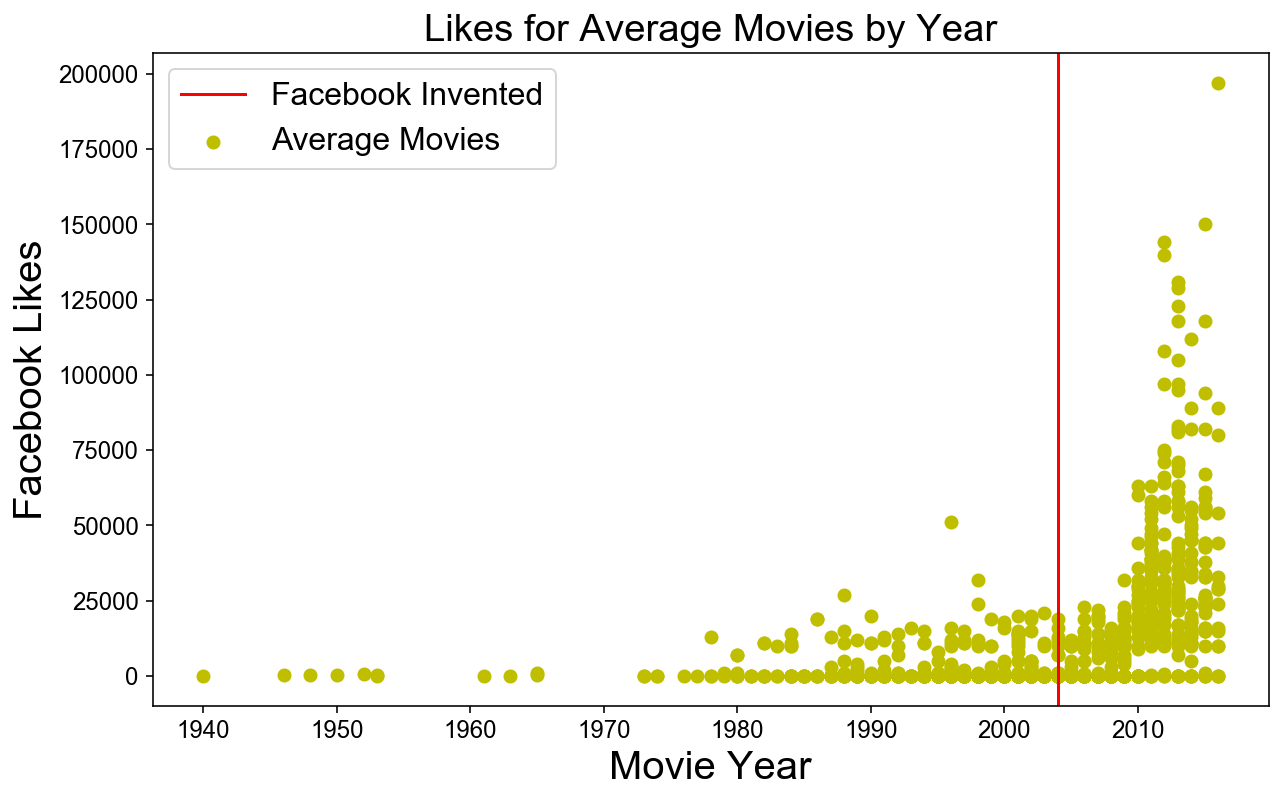

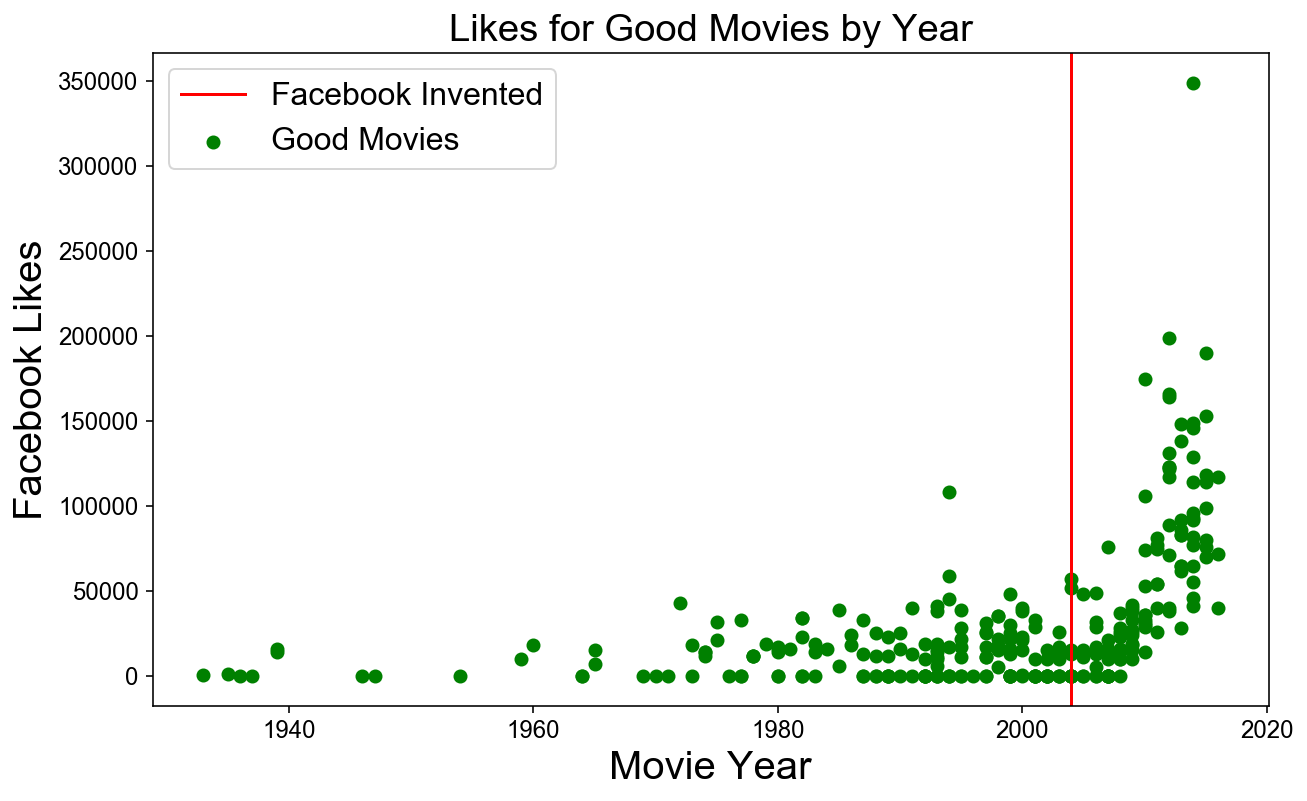

In [19]:
plt.scatter(poor['title_year'],poor['movie_facebook_likes'], color='r', label="Poor Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.title('Likes for Poor Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

plt.scatter(average['title_year'],average['movie_facebook_likes'], color='y', label="Average Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.title('Likes for Average Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

plt.scatter(good['title_year'],good['movie_facebook_likes'], color='g', label="Good Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.title('Likes for Good Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

In [20]:
films_by_prolific={}
for name,score in m['director_name'].value_counts().iteritems():
    movies_by_director = m[m['director_name']==name]
    if score not in films_by_prolific:
        films_by_prolific[score] = movies_by_director.copy()
    else:
        films_by_prolific[score] = pd.concat([films_by_prolific[score], movies_by_director], ignore_index=True)
        
keyList = list(films_by_prolific.keys())
meanList = [df['gross'].mean() for df in films_by_prolific.values()]

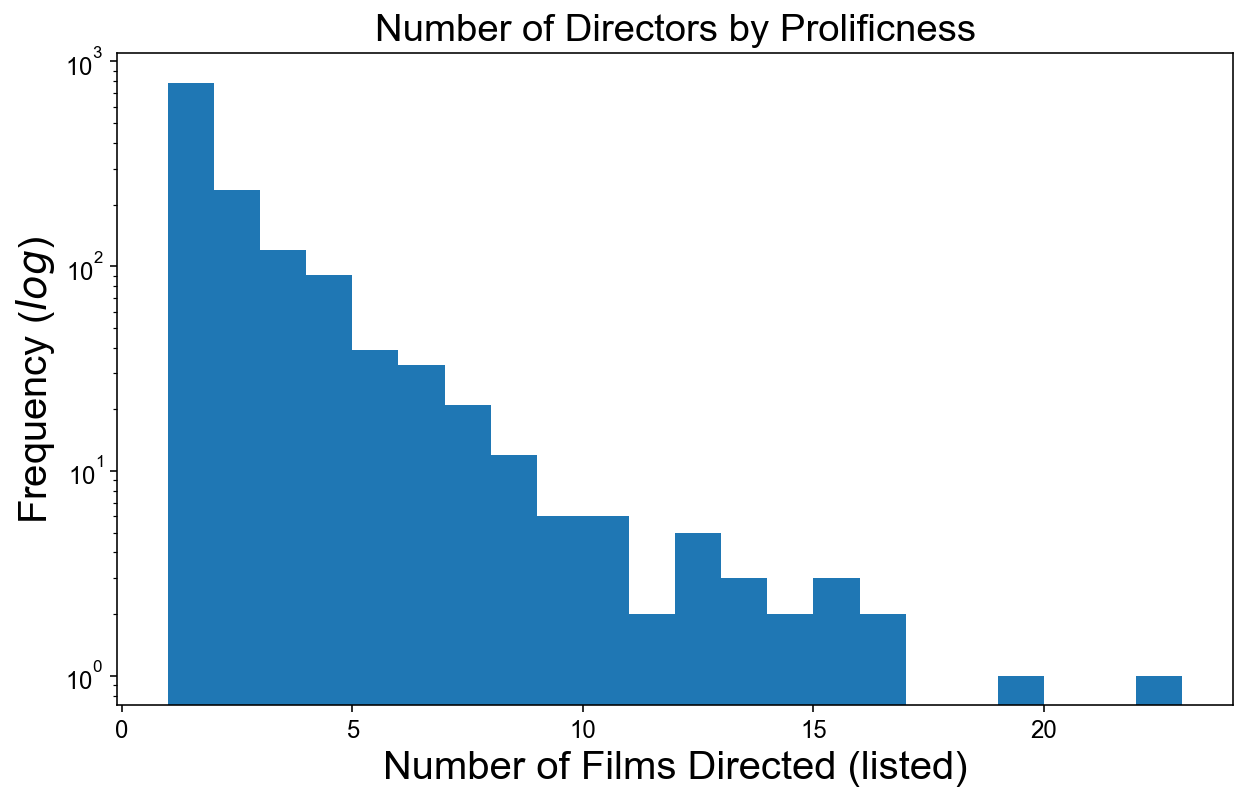

In [21]:
# DATA VISUALIZATION
# Number of directors who direct a certain number of movies on the list
# "How prolific are the directors?"
dc=m['director_name'].value_counts().value_counts().index
dr=abs(dc.max()-dc.min())

plt.hist(m['director_name'].value_counts(),bins=dr)
plt.yscale('log')
plt.title('Number of Directors by Prolificness')
plt.xlabel('Number of Films Directed (listed)')
plt.ylabel('Frequency ($log$)')
plt.show()

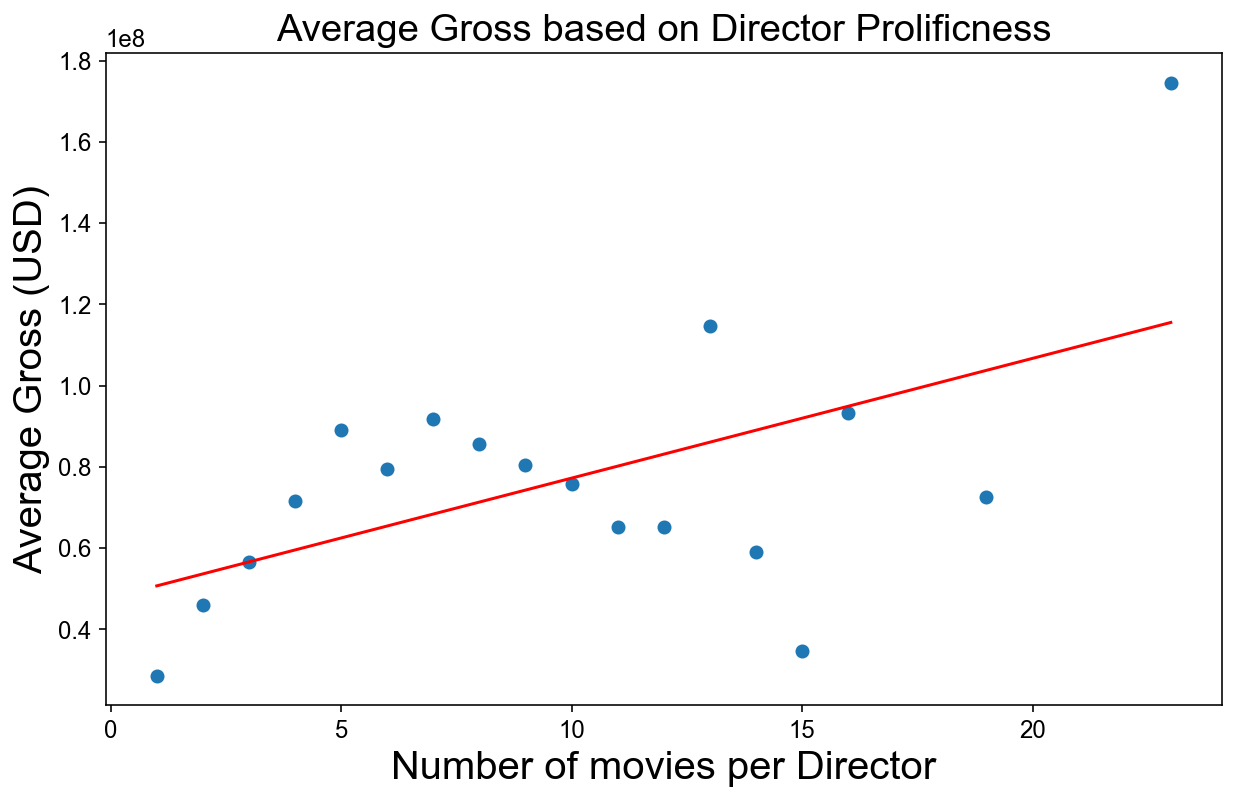

In [22]:
plt.scatter(keyList, meanList)
plt.plot(np.unique(keyList), np.poly1d(np.polyfit(keyList, meanList, 1))(np.unique(keyList)), color='r')
plt.xlabel('Number of movies per Director')
plt.ylabel('Average Gross (USD)')
plt.title('Average Gross based on Director Prolificness')
plt.show()

In [23]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3001 non-null object
title_year                   3001 non-null float64
genres                       3001 non-null object
duration                     3001 non-null float64
budget                       3001 non-null float64
gross                        3001 non-null float64
language                     3001 non-null category
country                      3001 non-null category
content_rating               3001 non-null category
color                        3001 non-null category
aspect_ratio                 3001 non-null category
facenumber_in_poster         3001 non-null float64
director_name                3001 non-null object
movie_facebook_likes         3001 non-null int32
director_facebook_likes      3001 non-null float64
actor_1_facebook_likes       3001 non-null float64
actor_2_facebook_likes       3001 non-null float64
actor_3_facebook_likes    

In [26]:
m[m['director_name'] == "Steven Spielberg"]['gross'].describe()

count    2.300000e+01
mean     1.745244e+08
std      1.014211e+08
min      4.417539e+07
25%      8.702961e+07
50%      1.644352e+08
75%      2.316758e+08
max      4.349495e+08
Name: gross, dtype: float64

In [27]:
print(4.3e8)

430000000.0
